# 作业5：机器学习-分类算法-逻辑回归
#### 要求：
- 在Python Jupyter中回答，需运行出结果。
- 网页-打印-另存为pdf，命名：作业5-班级-学号后两位-姓名.pdf
- 按时上传职教云，过期不补。

### 任务一：逻辑回归可视化：是否录取模型（分类）
- 数据：data/ex2data1.txt
- 字段1：exam1，科目1成绩
- 字段2：exam2，科目2成绩
- 字段3：Admitted，是否被录取，1被录取，0未录取。

In [1]:
# 导入必要的包
import pandas as pd # 导入pandas
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split # 训练集 测试集拆分
from sklearn.linear_model import LogisticRegression# 逻辑回归
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix # 混淆矩阵
from sklearn.metrics import classification_report # 分类报告：包含了精度，召回率和f1值

### 1. 数据加载

In [2]:
# 数据加载
data = pd.read_csv('data/ex2data1.txt', header=None, names=["exam1", "exam2", "Admitted"])
data.head()

,exam1,exam2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [3]:
# 查看数据基本信息
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   exam1     100 non-null    float64
 1   exam2     100 non-null    float64
 2   Admitted  100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [4]:
# 查看目标字段的数据分布
data['Admitted'].value_counts()

1    60
0    40
Name: Admitted, dtype: int64

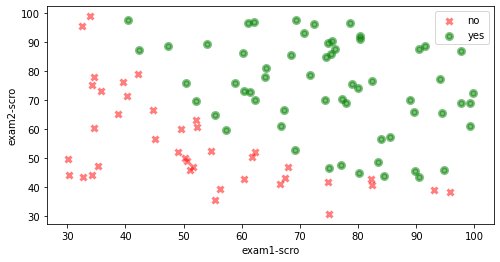

In [5]:
# 数据可视化：通过的用绿色o表示，未通过用红色x表示，观察数据
plt.figure(figsize=(8, 4))

x0 = data[data['Admitted'] == 0].drop(['exam2', 'Admitted'], axis=1)
y0 = data[data['Admitted'] == 0].drop(['exam1', 'Admitted'], axis=1)

x1 = data[data['Admitted'] == 1].drop(['exam2', 'Admitted'], axis=1)
y1 = data[data['Admitted'] == 1].drop(['exam1', 'Admitted'], axis=1)

plt.scatter(x0, y0, color='r', alpha=0.5, linewidths=3, marker='x', label='no')
plt.scatter(x1, y1, color='g', alpha=0.5, linewidths=3, marker='o', label='yes')
plt.legend()

plt.xlabel('exam1-scro')
plt.ylabel("exam2-scro")


plt.show()



### 2. 数据集拆分

In [6]:
# 生成特征矩阵X，目标变量y
X = data.drop(['Admitted'], axis=1)
y = data['Admitted']

In [7]:
# 拆分训练集和测试集，分别为0.8，0.2，随机种子666
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=666)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((80, 2), (20, 2), (80,), (20,))

### 3. 数据处理（这里数据两个字段，范围接近，可以不做标准化）
### 4. 构建模型

In [8]:
# 构建逻辑回归模型
lgr = LogisticRegression()
# 用训练数据 训练模型
lgr.fit(X_train, y_train)
# 输出模型参数
print('逻辑回归的参数w和b分别是：',  lgr.coef_, lgr.intercept_)

逻辑回归的参数w和b分别是： [[0.22756937 0.19779402]] [-25.85537181]


### 5. 模型评估

In [9]:
# 模型评估
# 混淆矩阵
# 分类报告：包含了精度，召回率和f1值
# 在训练集上的效果
y_train_pred = lgr.predict(X_train)
print('测试集上的混淆矩阵：\n', confusion_matrix(y_train, y_train_pred))
print('\n训练集上的分类报告：\n', classification_report(y_train, y_train_pred))

测试集上的混淆矩阵：
 [[27  4]
 [ 3 46]]

训练集上的分类报告：
               precision    recall  f1-score   support

           0       0.90      0.87      0.89        31
           1       0.92      0.94      0.93        49

    accuracy                           0.91        80
   macro avg       0.91      0.90      0.91        80
weighted avg       0.91      0.91      0.91        80



In [10]:
# 在测试集上的效果
y_test_pred = lgr.predict(X_test)
print('训练集上的混淆矩阵：\n', confusion_matrix(y_test, y_test_pred))
print('\n训练集上的分类报告：\n', classification_report(y_test, y_test_pred))

训练集上的混淆矩阵：
 [[ 7  2]
 [ 0 11]]

训练集上的分类报告：
               precision    recall  f1-score   support

           0       1.00      0.78      0.88         9
           1       0.85      1.00      0.92        11

    accuracy                           0.90        20
   macro avg       0.92      0.89      0.90        20
weighted avg       0.92      0.90      0.90        20



### 6. 模型可视化（选做）
#### 画出模型的边界线，以及训练集和测试集的数据。  边界线：w1x1+w2x2+b = 0， x2 = -（w1x1+b）/w2
#### 对照上面的训练集和测试集的分类报告，找到对应关系。

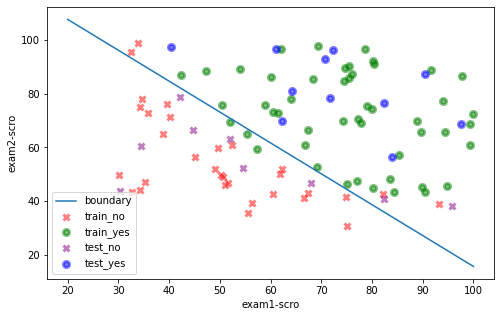

In [15]:
plt.figure(figsize=(8,5))
df_train = pd.concat([X_train, y_train], axis=1)
# train_no
df_train_no_exam1 = df_train[df_train['Admitted']==0].drop(["Admitted", "exam2"],axis=1)
# X_train[y_train == 1]
df_train_no_exam2 = df_train[df_train['Admitted']==0].drop(["Admitted", "exam1"],axis=1)
plt.scatter(df_train_no_exam1,df_train_no_exam2, color='r', alpha=0.5, linewidths=3, marker='x', label='train_no')

# train_yes
df_train_yes_exam1 = df_train[df_train['Admitted']==1].drop(["Admitted", "exam2"],axis=1)
df_train_yes_exam2 = df_train[df_train['Admitted']==1].drop(["Admitted", "exam1"],axis=1)
plt.scatter(df_train_yes_exam1,df_train_yes_exam2, color='g', alpha=0.5, linewidths=3, marker='o', label='train_yes')

# test_no
df_test = pd.concat([X_test, y_test], axis=1)
df_test_no_exam1 = df_test[df_test['Admitted']==0].drop(["Admitted", "exam2"],axis=1)
df_test_no_exam2 = df_test[df_test['Admitted']==0].drop(["Admitted", "exam1"],axis=1)
plt.scatter(df_test_no_exam1,df_test_no_exam2, color='#800080', alpha=0.5, linewidths=3, marker='x', label='test_no')

# test_yes
df_test = pd.concat([X_test, y_test], axis=1)
df_test_yes_exam1 = df_test[df_test['Admitted']==1].drop(["Admitted", "exam2"],axis=1)
df_test_yes_exam2 = df_test[df_test['Admitted']==1].drop(["Admitted", "exam1"],axis=1)
plt.scatter(df_test_yes_exam1,df_test_yes_exam2, color='b', alpha=0.5, linewidths=3, marker='o', label='test_yes')

# boundary 这个不会画
import numpy as np
w1 = lgr.coef_[0][0]
w2 = lgr.coef_[0][1]
b = lgr.intercept_[0]
boundary_x = np.linspace(20, 100, 100)
boundary_y = -(w1 * boundary_x + b) / w2
plt.plot(boundary_x, boundary_y, label='boundary')

plt.xlabel('exam1-scro')
plt.ylabel("exam2-scro")
plt.legend()
plt.show()

Text(0, 0.5, 'Exam2-score')

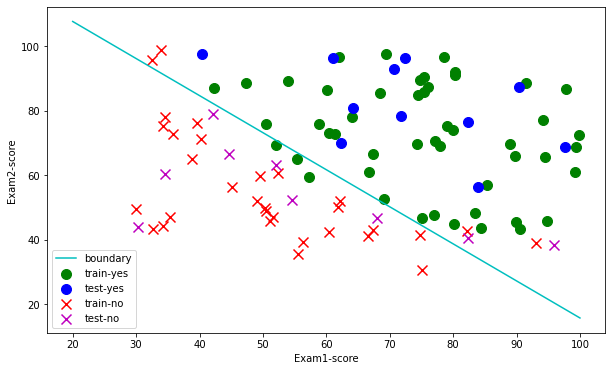

In [38]:
# 画出模型的分界线，以及训练集和测试集的数据


